In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("1.csv", header=None, names=["time","counts","span"])

In [3]:
print(df)

           time     counts  span
0    1615993200  3551119.0   600
1    1615993800  3517804.0   600
2    1615994400  3553455.0   600
3    1615995000  3625036.0   600
4    1615995600  3664903.0   600
..          ...        ...   ...
427  1616249400  5157282.0   600
428  1616250000  3518859.0   600
429  1616250600  3499013.0   600
430  1616251200  3649223.0   600
431  1616251800  3560582.0   600

[432 rows x 3 columns]


In [5]:
import datetime

In [10]:
df['time'] = pd.to_datetime(df['time'].astype(int), unit='s')

In [11]:
print(df['time'])

0     2021-03-17 15:00:00
1     2021-03-17 15:10:00
2     2021-03-17 15:20:00
3     2021-03-17 15:30:00
4     2021-03-17 15:40:00
              ...        
427   2021-03-20 14:10:00
428   2021-03-20 14:20:00
429   2021-03-20 14:30:00
430   2021-03-20 14:40:00
431   2021-03-20 14:50:00
Name: time, Length: 432, dtype: datetime64[ns]


In [13]:
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil

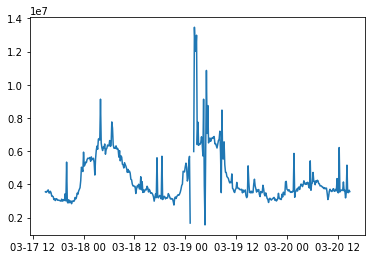

In [14]:
plt.plot(df['time'], df['counts'])

In [15]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [25]:
Q = df['counts']

In [26]:
P = Q.dropna()

In [29]:
size = int(len(P) * 0.5)
train, test = P[0:size], P[size:len(P)]
history = [p for p in train]
predictions = list()

In [24]:
print(P.dropna())

0      3551119.0
1      3517804.0
2      3553455.0
3      3625036.0
4      3664903.0
         ...    
427    5157282.0
428    3518859.0
429    3499013.0
430    3649223.0
431    3560582.0
Name: counts, Length: 428, dtype: float64


In [31]:
print(Q)

0      3551119.0
1      3517804.0
2      3553455.0
3      3625036.0
4      3664903.0
         ...    
427    5157282.0
428    3518859.0
429    3499013.0
430    3649223.0
431    3560582.0
Name: counts, Length: 432, dtype: float64


In [32]:
print(P)

0      3551119.0
1      3517804.0
2      3553455.0
3      3625036.0
4      3664903.0
         ...    
427    5157282.0
428    3518859.0
429    3499013.0
430    3649223.0
431    3560582.0
Name: counts, Length: 428, dtype: float64


In [33]:
size = int(len(P) * 0.5)
train, test = P[0:size], P[size:len(P)]
history = [p for p in train]
predictions = list()

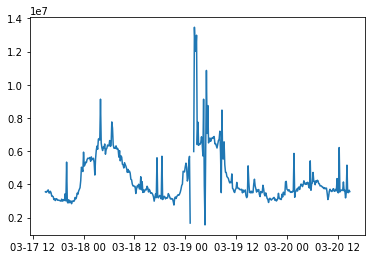

In [36]:
plt.plot(df['time'], Q)

In [41]:
a = []
for i in P:
    a.append(i)

In [42]:
print(a)

[3551119.0, 3517804.0, 3553455.0, 3625036.0, 3664903.0, 3486503.0, 3480593.0, 3582042.0, 3487264.0, 3284283.0, 3287707.0, 3256301.0, 3084049.0, 3135047.0, 3023832.0, 3127794.0, 3130631.0, 3044584.0, 3058036.0, 3035851.0, 3035376.0, 3003703.0, 2990305.0, 3106389.0, 2987793.0, 3073597.0, 3014794.0, 3049000.0, 3433160.0, 3002511.0, 5340149.0, 2943813.0, 2877265.0, 3070133.0, 2899225.0, 2913476.0, 3007414.0, 2833693.0, 2965755.0, 3001936.0, 2972138.0, 3010260.0, 3207806.0, 3126125.0, 3227850.0, 3466975.0, 3402328.0, 3593598.0, 3701771.0, 3797929.0, 4217860.0, 5033816.0, 4943125.0, 4772623.0, 5941358.0, 5102654.0, 5179816.0, 5341197.0, 5308336.0, 5495921.0, 5575804.0, 5569658.0, 5552145.0, 5619230.0, 5391863.0, 5656154.0, 5485062.0, 5543718.0, 5573849.0, 5313573.0, 4561150.0, 5542777.0, 6045886.0, 6304895.0, 6113887.0, 6726776.0, 6758643.0, 6669246.0, 9134855.0, 6498411.0, 6191253.0, 6038029.0, 6254600.0, 6206080.0, 6432640.0, 5818382.0, 6101162.0, 6177769.0, 6369623.0, 6321063.0, 6331913.0

In [43]:
P = []
for i in a:
    P.append(i)

In [44]:
print(P)

[3551119.0, 3517804.0, 3553455.0, 3625036.0, 3664903.0, 3486503.0, 3480593.0, 3582042.0, 3487264.0, 3284283.0, 3287707.0, 3256301.0, 3084049.0, 3135047.0, 3023832.0, 3127794.0, 3130631.0, 3044584.0, 3058036.0, 3035851.0, 3035376.0, 3003703.0, 2990305.0, 3106389.0, 2987793.0, 3073597.0, 3014794.0, 3049000.0, 3433160.0, 3002511.0, 5340149.0, 2943813.0, 2877265.0, 3070133.0, 2899225.0, 2913476.0, 3007414.0, 2833693.0, 2965755.0, 3001936.0, 2972138.0, 3010260.0, 3207806.0, 3126125.0, 3227850.0, 3466975.0, 3402328.0, 3593598.0, 3701771.0, 3797929.0, 4217860.0, 5033816.0, 4943125.0, 4772623.0, 5941358.0, 5102654.0, 5179816.0, 5341197.0, 5308336.0, 5495921.0, 5575804.0, 5569658.0, 5552145.0, 5619230.0, 5391863.0, 5656154.0, 5485062.0, 5543718.0, 5573849.0, 5313573.0, 4561150.0, 5542777.0, 6045886.0, 6304895.0, 6113887.0, 6726776.0, 6758643.0, 6669246.0, 9134855.0, 6498411.0, 6191253.0, 6038029.0, 6254600.0, 6206080.0, 6432640.0, 5818382.0, 6101162.0, 6177769.0, 6369623.0, 6321063.0, 6331913.0

In [45]:
size = int(len(P) * 0.66)
train, test = P[0:size], P[size:len(P)]
history = [p for p in train]
predictions = list()

In [46]:
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))

predicted=3358013.263466, expected=3290919.000000
predicted=3317320.898202, expected=5114716.000000
predicted=4509484.283459, expected=4138096.000000
predicted=3938192.240858, expected=3507077.000000
predicted=3840235.697624, expected=3578262.000000
predicted=3544164.211654, expected=3479555.000000
predicted=3433457.802429, expected=3585658.000000
predicted=3861106.495326, expected=3497671.000000
predicted=3601593.539103, expected=3503839.000000
predicted=3523791.403861, expected=4024373.000000
predicted=3847300.900591, expected=4309408.000000
predicted=4029785.228629, expected=3903687.000000
predicted=3900003.638015, expected=3733892.000000
predicted=3802084.521778, expected=3533252.000000
predicted=3573549.016825, expected=3665780.000000
predicted=3736474.489745, expected=3586411.000000
predicted=3697552.331735, expected=3688402.000000
predicted=3729624.646866, expected=3380528.000000
predicted=3475330.016908, expected=3264480.000000
predicted=3388985.750561, expected=3568474.000000


Test MSE: 245643518694.214


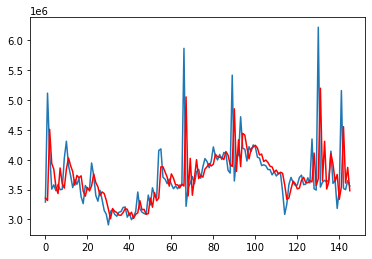

In [48]:
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot

plt.plot(test)
plt.plot(predictions, color='red')
plt.show()